# Chuẩn bị dữ liệu

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
"""
transforms.Compose: tạo ra một chuỗi các phép biến đổi

transforms.ToTensor(): chuyển từ định dạng PIL Image hoặc NumPy array thành tensor
+ PIL Image hoặc NumPy array: đầu vào thường là ảnh có thể là 1 trong 2 định dạng
+ Tensor: đầu ra là một tensor của PyTorch, với các giá trị màu chuẩn hóa từ 0-255 về 0-1
+ vì tensor là cơ sở dữ liệu chính của PyTorch có thể xử lý tích hợp mảng, ma trận... 

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)):
mean=(0.5, 0.5, 0.5) và std=(0.5, 0.5, 0.5) tương ứng với giá trị tb và độ lệch chuẩn của chuỗi kênh màu (Red, Green, Blue)
chuẩn hóa giá trị màu của 1 pixel từ [0,1] về [-1,1] với công thức
pixel = (pixel - mean) / std
"""
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

"""
torchvision.datasets.CIFAR10: Hàm này được sử dụng để tải xuống và nạp tập dữ liệu CIFAR-10.
root='./data': đường dẫn lưu
train=True or train = False: xác định phiên bản này sẽ nạp tập vào tập để huấn luyện hoặc không
download=True: Nếu dl không được tìm thấy tại vị trí chỉ định thì nó sẽ được tải xuống

trainset và testset là một đối tượng của lớp Dataset, đại diện cho toàn bộ tập dữ liệu gồm các ảnh và nhãn như 1 tệp lưu trữ dl
"""
trainset = torchvision.datasets.CIFAR10(root='../data/cifar10', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='../data/cifar10', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
"""
torch.utils.data.DataLoader: Hàm này tạo ra một DataLoader có thể lặp qua tập dữ liệu.
 DataLoader là công cụ của PyTorch để tải dữ liệu một cách hiệu quả
trainset: tập dl để nạp
batch_size=batch_size: số lượng mẫu được xử lý cho mỗi batch để nạp
shuffle=True: trộn 
num_workers=2: Số lượng luồng phụ trợ để sử dụng cho việc nạp dữ liệu.

trainloader và testloader là 1 đối tượng của lớp DataLoader, được tạo ra từ trainset và testset. 
cung cấp 1 cách thuận tiện để duyệt qua dl theo dạng batch
"""
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

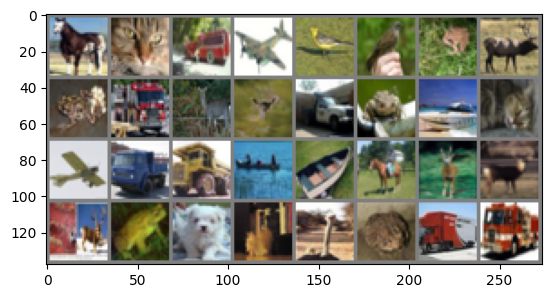

horse cat truck plane bird bird frog deer frog truck deer deer truck frog ship cat plane truck truck ship ship horse deer deer deer frog dog cat bird frog truck truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img * 0.5 + 0.5 # unnormalize from [-1,1] to [0,1]
    npimg = img.numpy() # chuyển tensor thành numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Chuyển trục để hiển thị đúng màu (C,H,W)->(H,W,C)
    plt.show()

# tạo iterator cho trainloader 
dataiter = iter(trainloader) 
# Lấy một batch dữ liệu từ iterator, trả về images (tensor của batch ảnh) và labels (tensor chứa nhãn của các ảnh trong batch).
images, labels = next(dataiter) 

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[i]] for i in range(len(labels))))

# Xây dựng mô hình

In [6]:
# 1 lớp ẩn
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()  # Chuyển ảnh thành vector 1D
        self.fc1 = nn.Linear(input_size, hidden_size)  # Lớp fully connected 
        self.relu = nn.ReLU()  # Kích hoạt ReLu
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [7]:
input_size = 32 * 32 * 3  # CIFAR-10 có kích thước ảnh 32x32 với 3 kênh màu
hidden_size = 256
output_size = 10  # 10 lớp trong CIFAR-10
learning_rate = 0.001
batch_size = 32

# Khởi tạo mô hình, hàm mất mát và optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# Huấn luyện
epochs = 7  # Số lần lặp qua toàn bộ dữ liệu
for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs, labels

            # Reset gradient
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward và cập nhật trọng số
            loss.backward()
            optimizer.step()

            # Cộng dồn loss
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')
print('Trained!')

Epoch 1/7, Loss: 1.6692
Epoch 2/7, Loss: 1.4905
Epoch 3/7, Loss: 1.4157
Epoch 4/7, Loss: 1.3396
Epoch 5/7, Loss: 1.2896
Epoch 6/7, Loss: 1.2339
Epoch 7/7, Loss: 1.1887
Trained!


In [ ]:
correct = 0
total = 0

# Đánh giá mô hình
model.eval()  # Chuyển sang chế độ đánh giá
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Độ chính xác trên tập test: {100 * correct / total:.2f}%')

Độ chính xác trên tập test: 51.56%
